In [1]:
import glob
import os, time
import itertools
import numpy as np
#import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from PIL import Image
import io  

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta
from pandas.plotting import parallel_coordinates
#import plotly.express as px
#import plotly.graph_objects as go
#from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression
from natsort import natsorted

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline


In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2022-02-21-sc-aunr-1','analysis','') 
DATA_UV_DIR_PATH_ABS = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2022-02-21-sc-aunr-1','iterations','')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_SI = os.path.join(BASE_DIR_PATH, 'results', 'figs', 'si', '')


In [3]:
df = pd.read_csv('dataset-all_exp.csv')

## Convert the volumes in the parallel coordinate graph into concentrations

In [4]:
df

seeds  hcl  Asc-acid  silver  temp   loss
0     24.0  850       215     195    27  12.45
1     24.0  712       167     440    27  10.19
2     24.0  269       288     335    27  11.11
3     24.0  281       484     380    27  11.00
4     24.0  488       391     126    27   8.67
..     ...  ...       ...     ...   ...    ...
107   24.0   80       100     120    27   6.34
108   24.0  100       100     120    27   7.39
109   24.0  450       100     120    27   9.73
110   24.0  160       100     120    27  10.19
111   24.0  190       100     120    27  10.70

[112 rows x 6 columns]

In [5]:
df_conc = df.copy()
df_conc

df_conc['seeds'] = (df_conc['seeds']*0.5)/10000
df_conc['hcl'] = (df_conc['hcl']*1000)/10000
df_conc['Asc-acid'] = (df_conc['Asc-acid']*100)/10000
df_conc['silver'] = (df_conc['silver']*10)/10000

df_conc

seeds   hcl  Asc-acid  silver  temp   loss
0    0.0012  85.0      2.15   0.195    27  12.45
1    0.0012  71.2      1.67   0.440    27  10.19
2    0.0012  26.9      2.88   0.335    27  11.11
3    0.0012  28.1      4.84   0.380    27  11.00
4    0.0012  48.8      3.91   0.126    27   8.67
..      ...   ...       ...     ...   ...    ...
107  0.0012   8.0      1.00   0.120    27   6.34
108  0.0012  10.0      1.00   0.120    27   7.39
109  0.0012  45.0      1.00   0.120    27   9.73
110  0.0012  16.0      1.00   0.120    27  10.19
111  0.0012  19.0      1.00   0.120    27  10.70

[112 rows x 6 columns]

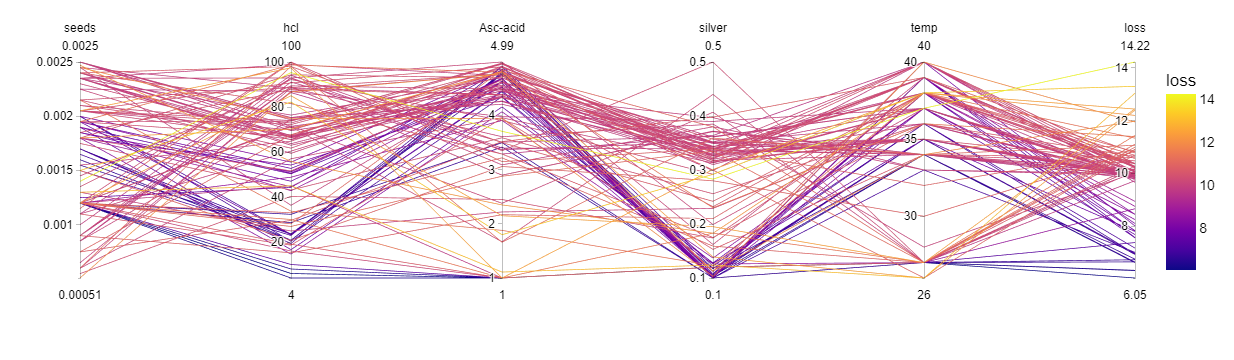

In [6]:
import plotly.express as px
import plotly.graph_objects as go

d = df_conc[['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss']]

fig = px.parallel_coordinates(d, color="loss",
                              dimensions=['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss'])

# Increase the text size
fig.update_layout(
    font=dict(
        size=14,  # Increase the text size
        family='Arial',
        color='black'
    )
)

fig.show()

# Constants factors
marginInches = 1/18
ppi = 96
width_inches = 5.9
height_inches = 3

fig.write_image(RESULT_DIR_PATH_SI + 'Fig_S6.pdf', width=(width_inches - marginInches)*ppi, height=(height_inches  - marginInches)*ppi)

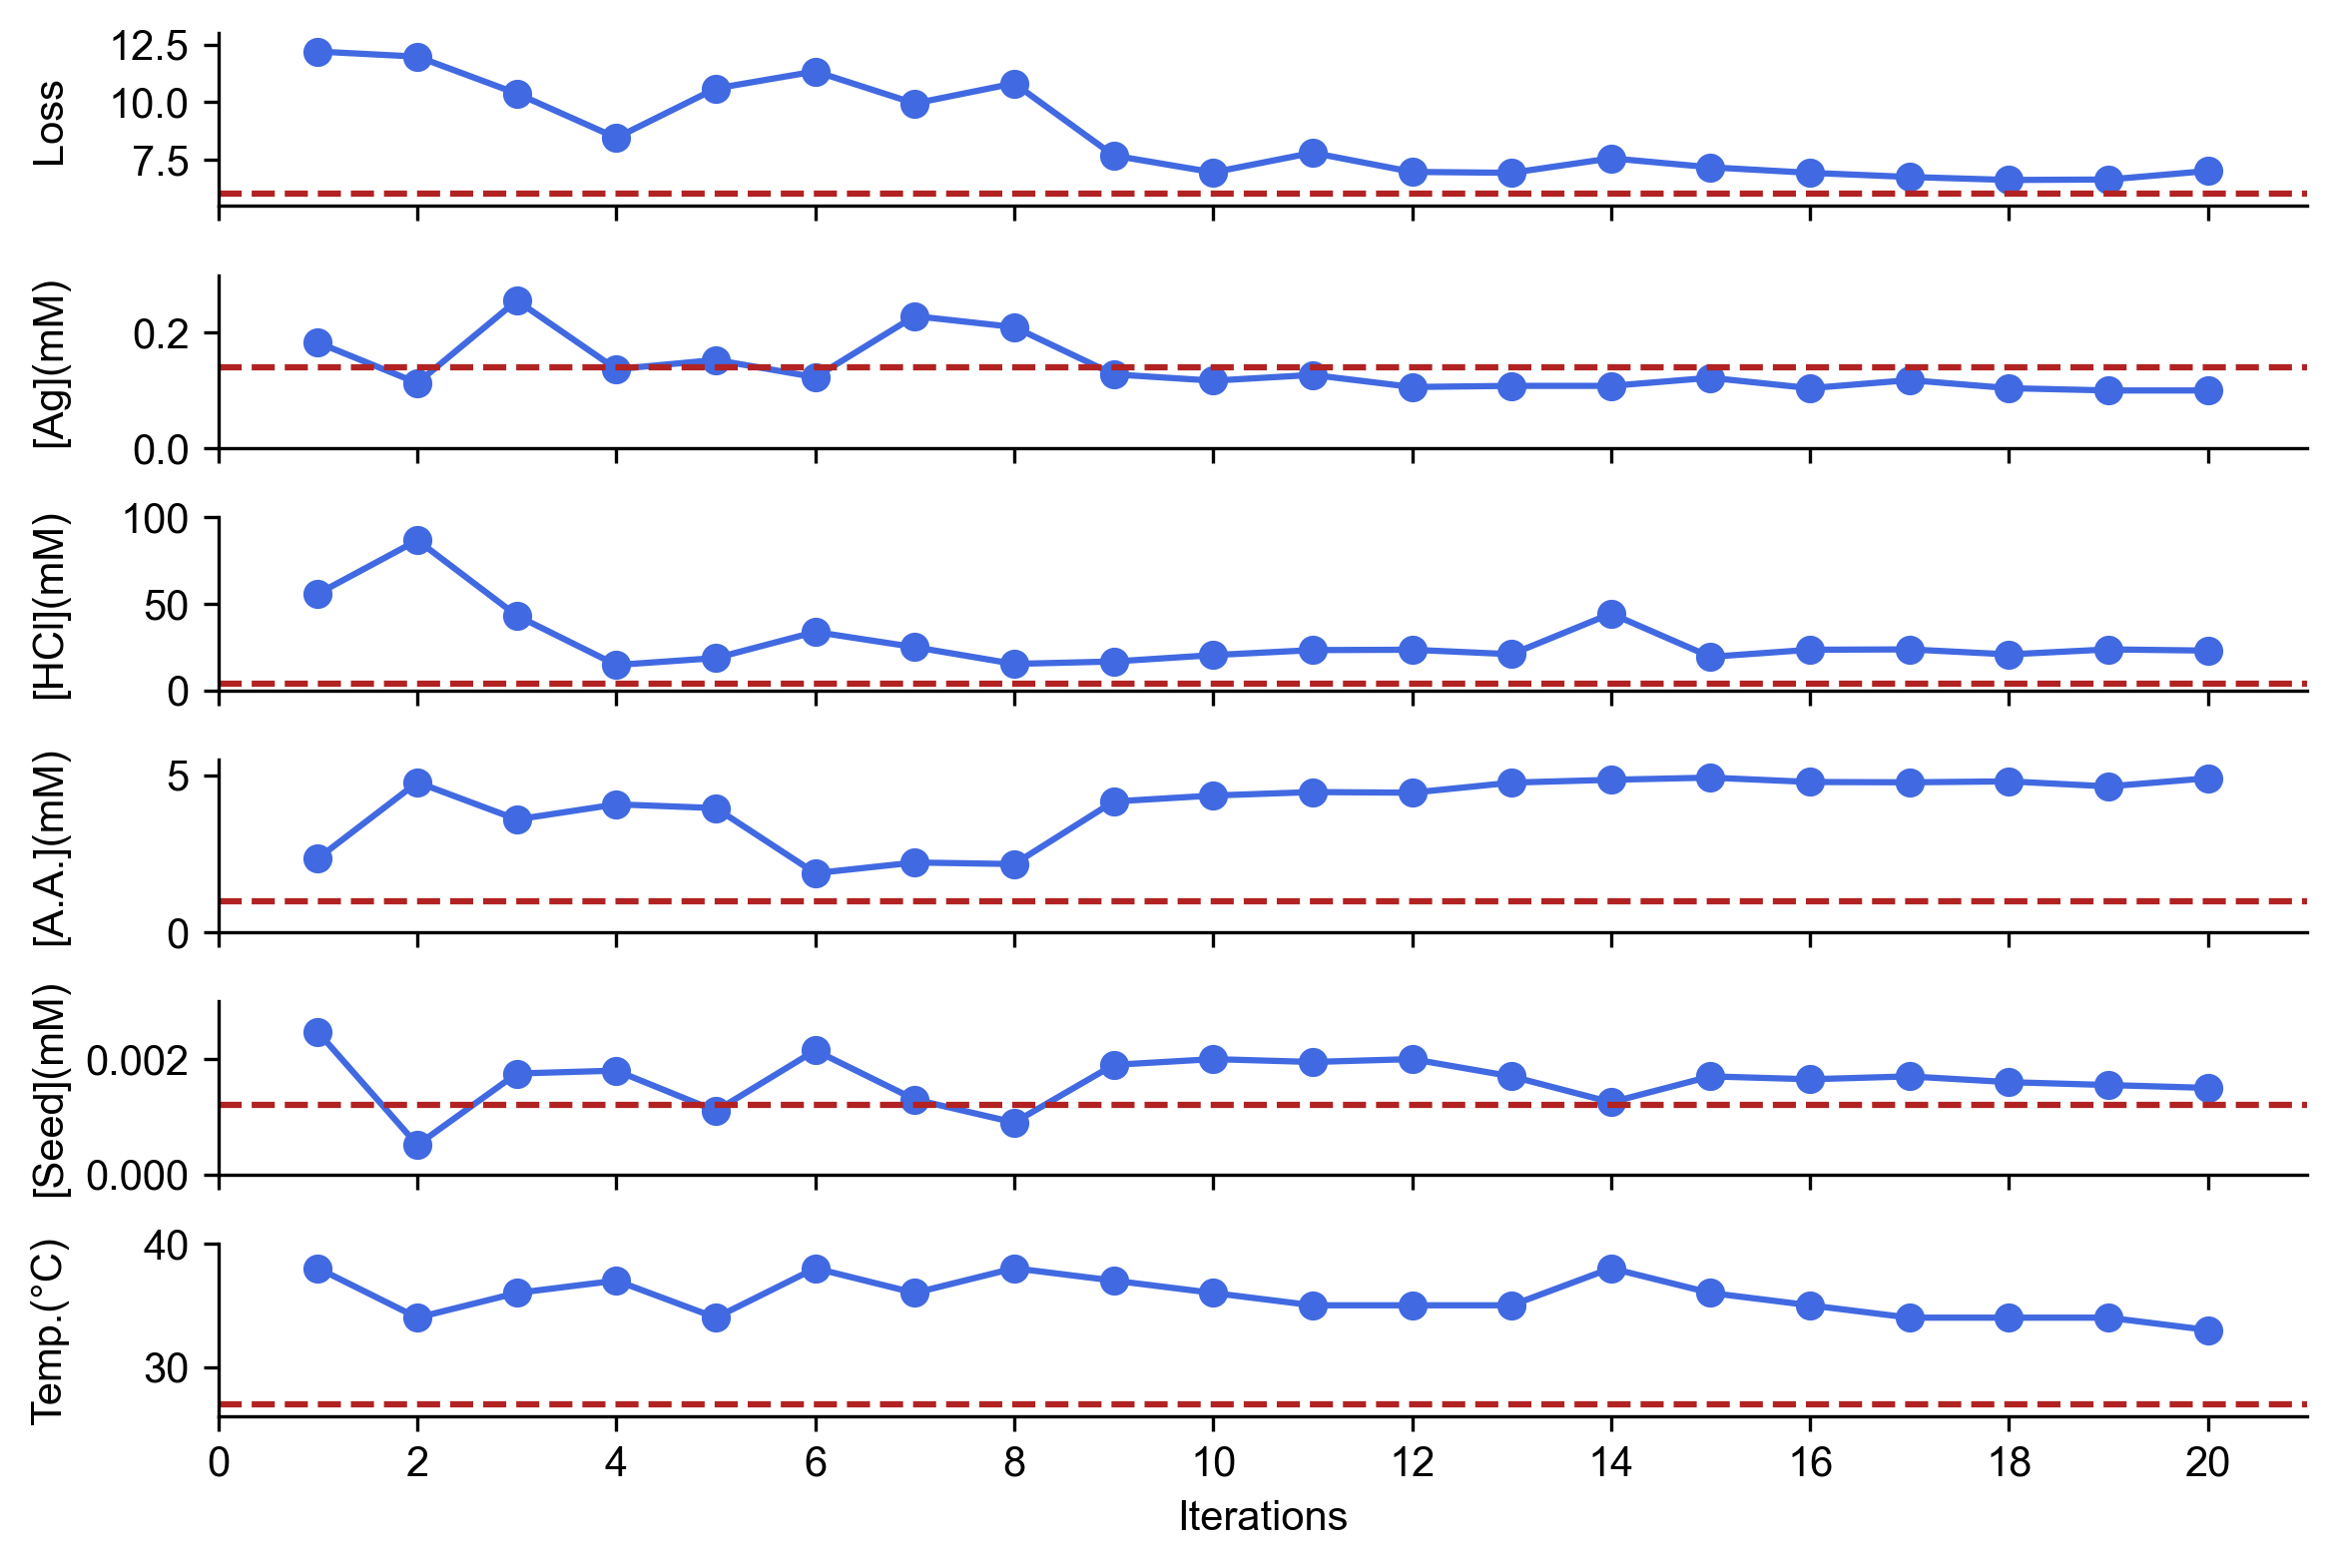

In [7]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(DATA_UV_DIR_PATH+'iterations.csv')

from matplotlib import rcParams
rcParams['font.family']='Arial'

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(9, 6), dpi = 300)

# Plot the first column against the second column in the first subplot
axs[0].plot(df['Iteration #'], df['loss parameter'], color = 'royalblue')
axs[0].scatter(df['Iteration #'], df['loss parameter'], color = 'royalblue')
axs[0].set_ylabel('Loss',  fontsize='medium', font='Arial')
axs[0].set_ylim(5.5,13)
axs[0].axhline(y = 6.05, color = 'firebrick', linestyle = '--')
axs[0].spines[['right','top']].set_visible(False)

# Plot the first column against the third column in the second subplot
axs[1].plot(df['Iteration #'], df['conc(ag)'], color = 'royalblue')
axs[1].scatter(df['Iteration #'], df['conc(ag)'], color = 'royalblue')
axs[1].set_ylabel('[Ag](mM)',  fontsize='medium', font='Arial')
axs[1].set_ylim(0,0.3)
axs[1].axhline(y = 0.14, color = 'firebrick', linestyle = '--')
axs[1].spines[['right','top']].set_visible(False)

# Plot the first column against the fourth column in the third subplot
axs[2].plot(df['Iteration #'], df['conc(hcl)'], color = 'royalblue')
axs[2].scatter(df['Iteration #'], df['conc(hcl)'], color = 'royalblue')
axs[2].set_ylabel('[HCl](mM)',  fontsize='medium', font='Arial')
axs[2].set_ylim(0,100)
axs[2].axhline(y = 4, color = 'firebrick', linestyle = '--')
axs[2].spines[['right','top']].set_visible(False)

# Plot the first column against the fourth column in the fourth subplot
axs[3].plot(df['Iteration #'], df['conc(aa)'], color = 'royalblue')
axs[3].scatter(df['Iteration #'], df['conc(aa)'], color = 'royalblue')
axs[3].set_ylabel('[A.A.](mM)',  fontsize='medium', font='Arial')
axs[3].set_ylim(0,5.5)
axs[3].axhline(y = 1, color = 'firebrick', linestyle = '--')
axs[3].spines[['right','top']].set_visible(False)

# Plot the first column against the fifth column in the fourth subplot
axs[4].plot(df['Iteration #'], df['conc(seed)'], color = 'royalblue')
axs[4].scatter(df['Iteration #'], df['conc(seed)'], color = 'royalblue')
axs[4].set_ylabel('[Seed](mM)',  fontsize='medium', font='Arial')
axs[4].set_ylim(0,0.003)
axs[4].axhline(y = 0.0012, color = 'firebrick', linestyle = '--')
axs[4].spines[['right','top']].set_visible(False)

# Plot the first column against the sixth column in the fourth subplot
axs[5].plot(df['Iteration #'], df['temperature [Anish]'], color = 'royalblue')
axs[5].scatter(df['Iteration #'], df['temperature [Anish]'], color = 'royalblue')
axs[5].set_ylabel(u'Temp.(\u00B0C)',  fontsize='medium', font='Arial')
axs[5].axhline(y = 27, color = 'firebrick', linestyle = '--')
axs[5].set_xlabel('Iterations',  fontsize='medium', font='Arial')
axs[5].set_xlim(0, 21) 
axs[5].set_xticks(range(0, 21, 2))  # Set the x-axis tick locations
axs[5].set_ylim(26,40)
axs[5].spines[['right','top']].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
fig.align_ylabels()

# Show the plot
plt.show()

fig.savefig(RESULT_DIR_PATH+'Fig_1c.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

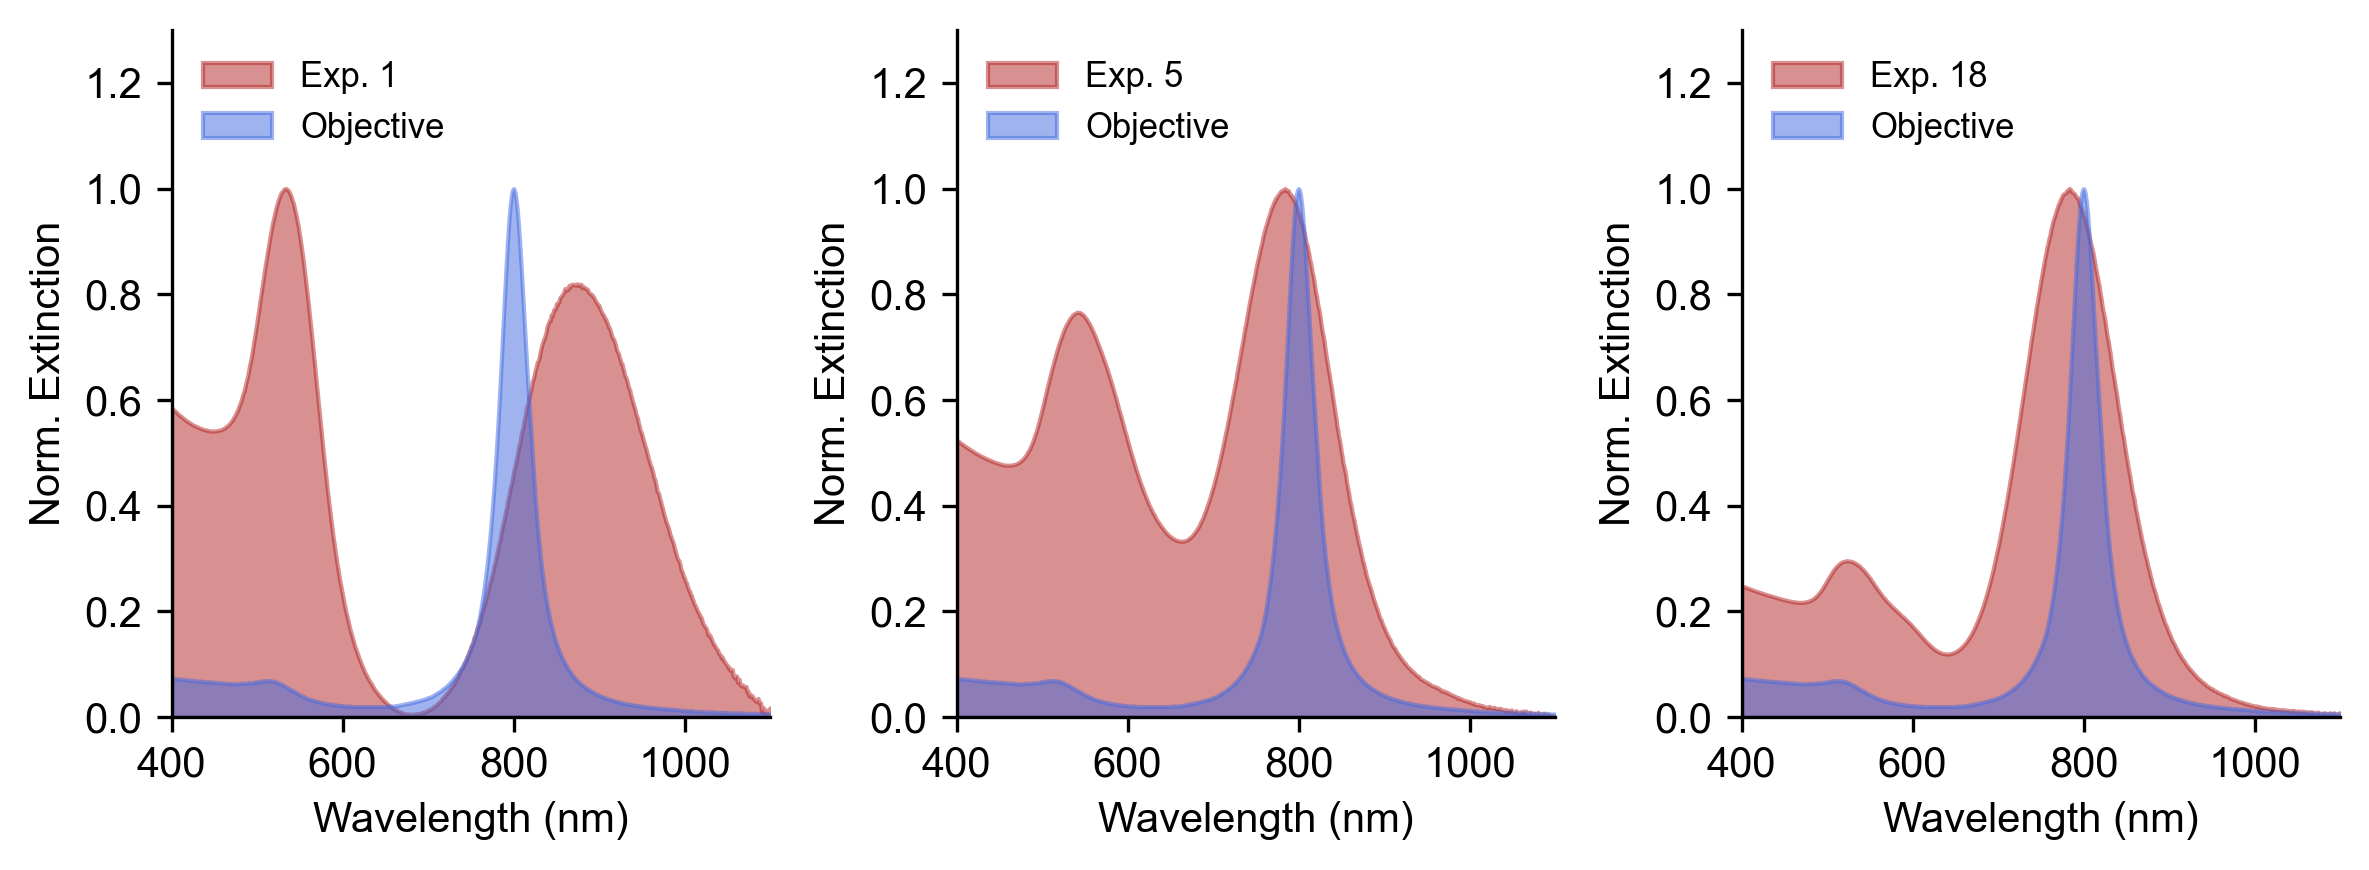

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import glob
import os

# Load reference CSV file
ref_df = pd.read_csv(os.path.join(DATA_UV_DIR_PATH_ABS, 'rev-obj.csv'), header=None)

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH_ABS

# Get a list of all CSV files in the folder
csv_files = natsorted(glob.glob(os.path.join(folder_path, '*.csv')))

# Define the reference CSV file name
ref_file_name = 'rev-obj.csv'

# Create a figure with 1 row and 2 columns of subplots, 12 inches long and 7.5 inches wide, 300 dpi
fig, axs = plt.subplots(1, 3, figsize=(8, 3), dpi=300)

# Initialize variables to keep track of subplot indices
col_index = 0

# Initialize empty list to store Abs at lambda max. / Abs at 400nm
abs_ratios = []
num = 1

# Define the experiment numbers you want to plot
experiments_to_plot = [1, 5, 18]

# Loop through all CSV files in the folder
for csv_file in csv_files:
    
    # Check if the current file is not the reference file and the experiment number is in the list to plot
    if os.path.basename(csv_file) != ref_file_name and num in experiments_to_plot:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, header=None)

        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())
        
        # Plot the normalized second column of the current file against the reference file in the current subplot
        axs[col_index].fill_between(df.iloc[:, 0], 0, df.iloc[:, 1], color='firebrick', label='Exp. '+str(num), alpha=0.5)
        axs[col_index].fill_between(ref_df[0], ref_df[1], 0, color='royalblue', label='Objective', alpha=0.5)
        
        axs[col_index].set_xlabel(r'Wavelength (nm)', fontsize='medium')
        axs[col_index].set_ylabel(r'Norm. Extinction', fontsize='medium')
        axs[col_index].legend(loc='upper left', frameon=False, fontsize='small')
        axs[col_index].set_xlim(400, 1100)
        axs[col_index].set_ylim([0, 1.3])
        axs[col_index].spines[['right', 'top']].set_visible(False)

        fig.tight_layout()

        # Increment the column index
        col_index += 1

        # Break the loop when both experiments are plotted
        if col_index == 3:
            break

    # Increment the experiment number
    num += 1

plt.show()

fig.savefig(RESULT_DIR_PATH+'Fig_1b.png', transparent=True, bbox_inches = 'tight')
